In [1]:
from wann_genetic.tools import ExperimentSeries
from util import accuracy_swarmplot
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [3]:
data_dir = "../data/mnist_extensive/single_weight"
series = ExperimentSeries.from_spec_file(data_dir)
series.discover_data_dir()
df_a = series.assemble_stats()
df_a['label'] = df_a['distribution/_name']
uni = df_a['label'] == 'uniform -2,2'
df_a.loc[uni, 'label'] = 'uniform\n(single w)'

In [4]:
data_dir = "../data/mnist_extensive/uniform_multiple_weights"
series = ExperimentSeries.from_spec_file(data_dir)
series.discover_data_dir()
df_b = series.assemble_stats()
df_b['label'] = 'uniform\n(multiple w)'

In [7]:
df = pd.concat([df_a, df_b])
df.sort_values('label', inplace=True)

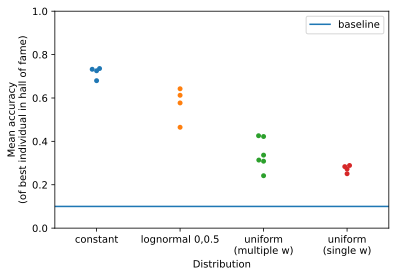

In [8]:
accuracy_swarmplot(data=df, x='label', xlabel='Distribution', baseline=0.1)